# Topography with RocketPy

Hello, along this jupyter notebook we will show how RocketPy can handle with the
Earth Topography. We mainly will use data provided by the NASADEM Merged DEM Global 1 arc second nc.

NASADEM is a digital elevation model based on the Shuttle Radar Topography Mission (SRTM), 
a collaboration between NASA and the National Geospatial-Intelligence Agency (NGA),
as well as participation from the German and Italian space agencies. 
You can read more about NASADEM at: https://cmr.earthdata.nasa.gov/search/concepts/C1546314436-LPDAAC_ECS.html

This is a first step forward stopping consider Earth as flat and can get us much
better results when we are flying next to mountains or valleys

## Initialization

First of all, we import the Environment Class, which allows to set topographic profiles

In [1]:
from rocketpy import Environment


For example, let's set an Environment consider a fictional launch at Switzerland.
First we need to set the basic information about our Environment object

In [2]:
Env = Environment(railLength=6, latitude=46.90479, longitude=8.07575, datum="WGS84")


Obs.: Notice that the `datum` argument is used only for the converting from geodesic 
(i.e. lat/lon) to UTM coordinate system.

## Set topography

Now we finally set our topography

In [3]:
Env.setTopographicProfile(
    type="NASADEM_HGT",
    file="../../data/sites/switzerland/NASADEM_NC_n46e008.nc",
    dictionary="netCDF4",
    crs=None,
)


Region covered by the Topographical file: 
Latitude from 46.000000° to 47.000000°
Longitude from 8.000000° to 9.000000°


## Find the launch site elevation

Once we defined the topographic profile, we can find the launch site elevation


In [4]:
elevation = Env.getElevationFromTopographicProfile(Env.latitude, Env.longitude)


And finally set the elevation to the Environment object:

In [5]:
Env.setElevation(elevation)


## Visualize information

Now we can see the elevation that we've set, as well as other important attributes 
of our Environment object. We do that by running the `.info()` method:

Launch Site Details

Launch Rail Length: 6  m
Launch Site Latitude: 46.90479°
Launch Site Longitude: 8.07575°
Reference Datum: WGS84
Launch Site UTM coordinates: 886538.30 E    5207102.17 N
Launch Site UTM zone: 31T
Launch Site Surface Elevation: 1565.0 m


Atmospheric Model Details

Atmospheric Model Type: StandardAtmosphere
StandardAtmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 838.84 hPa
Surface Temperature: 277.98 K
Surface Air Density: 1.051 kg/m³
Surface Speed of Sound: 333.86 m/s


Atmospheric Model Plots


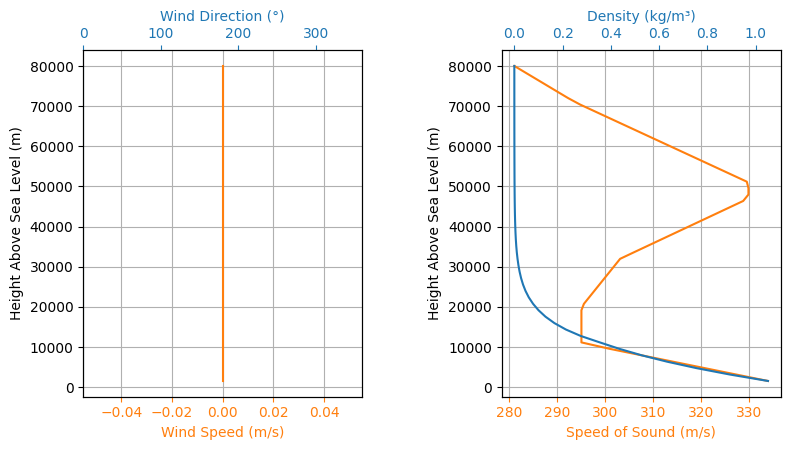

In [6]:
Env.info()


## Calculate Earth Radius at latitude

If we want to, we can calculate the Earth radius based on the launch site
latitude

In [7]:
eRadius = Env.calculateEarthRadius(Env.latitude)

print(
    "The Earth radius at latitude {:.6f}°:  {:.2f} km".format(Env.latitude, eRadius / 1000)
)


The Earth Radius at latitude 46.904790°:  6366.78 km
